In [1]:
import numpy as np
import cv2
from skimage.util import random_noise
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio
import os
from matplotlib.pyplot import figure
import skimage.io
from skimage.restoration import (denoise_wavelet, estimate_sigma)
from tqdm.notebook import tqdm

In [2]:
#------------------------------------
# Plots
#------------------------------------
#Adjust figure sizes
rcParams['figure.figsize'] = [10, 4]
plt.rcParams['figure.dpi'] = 100

## Validation Accuracy of Models

In [3]:
accuracy = [91.19, 91.23, 93.04, 87.28, 90.85, 65.00, 53.61]
model = ['MobileNetV2', 'Resnet50V2', 'InceptResNetV2', 'VGG19', 'InceptionV3', 'EfficientNetV2S', 'Custom CNN']

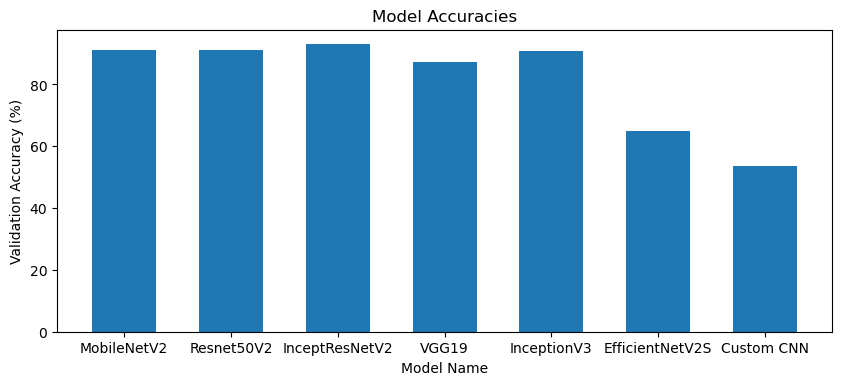

In [4]:
#------------------------------------------------------------
# Plot Model Accuracies
#------------------------------------------------------------
plt.bar(model, accuracy, 0.6)
plt.xlabel('Model Name')
plt.ylabel('Validation Accuracy (%)')
plt.title('Model Accuracies')
plt.show()

## Test Accuracy of Models

In [5]:
test_acc = [92.66, 90.47, 92.47, 86.19, 90.85, 65.00, 57.42]
model = ['MobileNetV2', 'Resnet50V2', 'InceptResNetV2', 'VGG19', 'InceptionV3', 'EfficientNetV2S', 'Custom CNN']

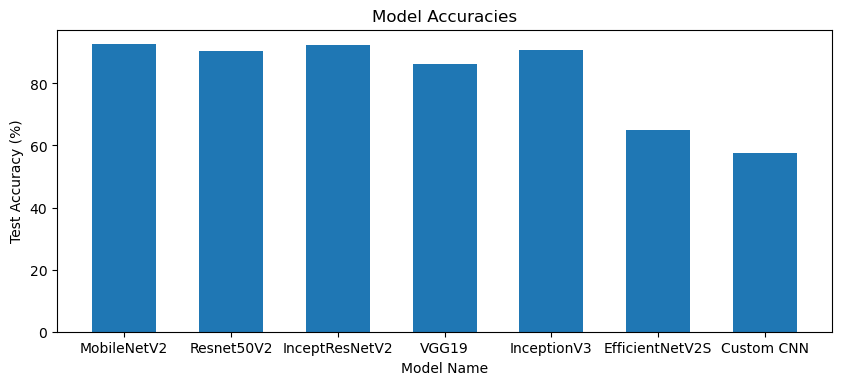

In [6]:
#------------------------------------------------------------
# Plot Model Accuracies
#------------------------------------------------------------
plt.bar(model, test_acc, 0.6)
plt.xlabel('Model Name')
plt.ylabel('Test Accuracy (%)')
plt.title('Model Accuracies')
plt.show()

## Inference time comparision 

In [7]:
#------------------------------------
# Plots
#------------------------------------
#Adjust figure sizes
rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

## FP32 Precision

In [8]:
# Inference time for model on various devices

GPU       = [0.0201, 0.0456, 0.0716, 0.1229, 0.0374, 0.0225]
CPU       = [0.0224, 0.0524, 0.0721, 0.1309, 0.0476, 0.0349]
NCS2      = [0.0418, 0.0685, 0.1244, 0.1830, 0.0556, 0.1435]
NCS2_Rasp = [0.0545, 0.0855, 0.1616, 0.2318, 0.0761, 0.1949]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV2', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']

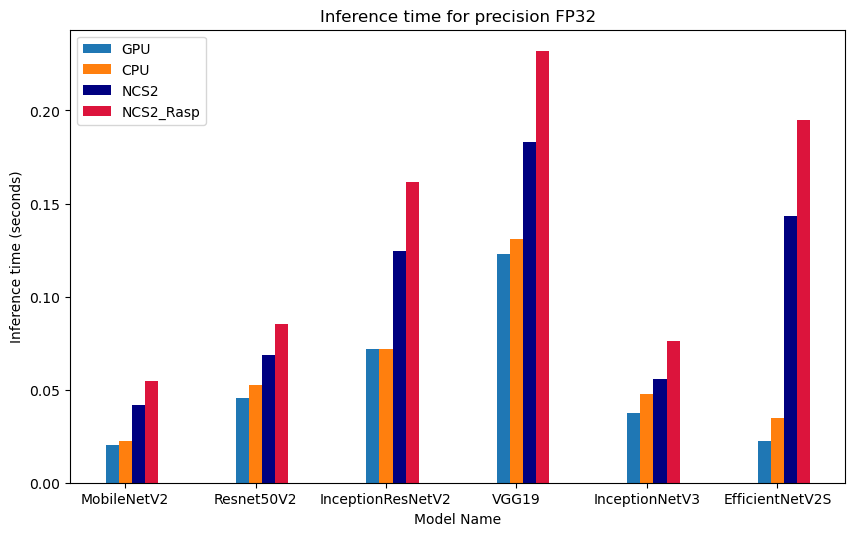

In [9]:
# Adjust figure sizes
rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
width = 0.1
X_axis=np.arange(0,6)
X_axis1 = X_axis
X_axis2 = X_axis + width
X_axis3 = X_axis + width*2
X_axis4 = X_axis + width*3

#------------------------------------------------------------
# Plot for FP32 Precision model
#------------------------------------------------------------
plt.bar(X_axis1, GPU, 0.1, label='GPU')
plt.bar(X_axis2, CPU, 0.1, label='CPU')
plt.bar(X_axis3, NCS2, color='navy', width=width, label='NCS2')
plt.bar(X_axis4, NCS2_Rasp, color='crimson', width=width, label='NCS2_Rasp')

plt.xlabel('Model Name')
plt.ylabel('Inference time (seconds)')
plt.title('Inference time for precision FP32')
plt.legend()
plt.xticks(X_axis+width, model)
plt.show()

## FP16 Precision

In [10]:
GPU       = [0.0193, 0.0311, 0.0549, 0.0516, 0.0307, 0.0211]
CPU       = [0.0212, 0.0451, 0.0591, 0.1267, 0.0384, 0.0324]
NCS2      = [0.0372, 0.0668, 0.1227, 0.1828, 0.0539, 0.1429]
NCS2_Rasp = [0.0522, 0.0835, 0.1448, 0.2314, 0.0723, 0.1898]

model = ['MobileNetV2', 'Resnet50V2', 'InceptionResNetV3', 'VGG19', 'InceptionNetV3', 'EfficientNetV2S']

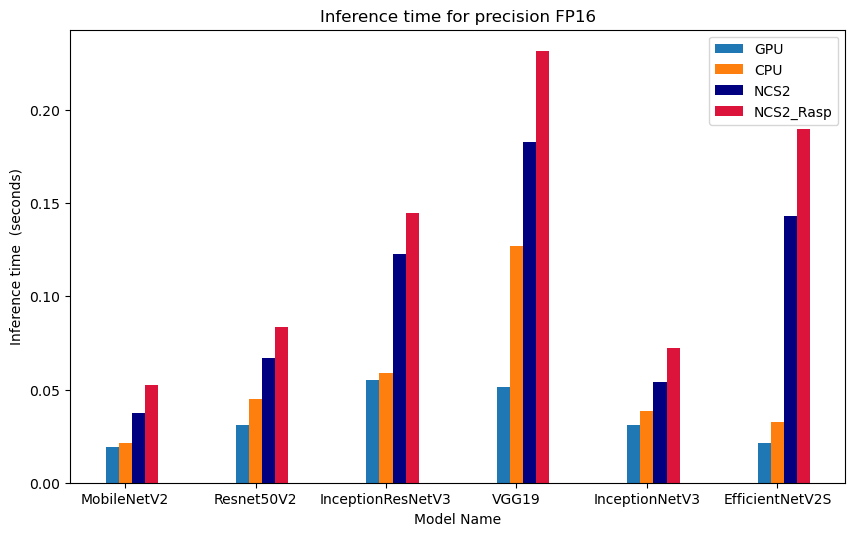

In [11]:
#------------------------------------------------------------
# Plot for FP16 Precision model
#------------------------------------------------------------
plt.bar(X_axis1, GPU, 0.1, label='GPU')
plt.bar(X_axis2, CPU, 0.1, label='CPU')
plt.bar(X_axis3, NCS2, color='navy', width=width, label='NCS2')
plt.bar(X_axis4, NCS2_Rasp, color='crimson', width=width, label='NCS2_Rasp')

plt.xlabel('Model Name')
plt.ylabel('Inference time  (seconds)')
plt.title('Inference time for precision FP16')
plt.legend()
plt.xticks(X_axis+width, model)
plt.show()